
# Module 9: Supervised Learning II
## Case Study – 2

### Objective: 
 * Practice Naive Bayes algorithm-based classification. 
 * Identify the predictors that can be of influence by experiment.


In [15]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Step 1: Load and Explore the Data
# We start by examining the dataset for missing values, data types, and general structure. 
# From the given description, no missing values are present.

# Load the dataset
data = pd.read_csv('run_or_walk.csv')

# Check basic info
print(data.info())
print(data.isnull().sum())

# Preview the data
print(data.head())

print(data.describe())

# Count of each class in the target
print(data['activity'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB
None
date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64
      

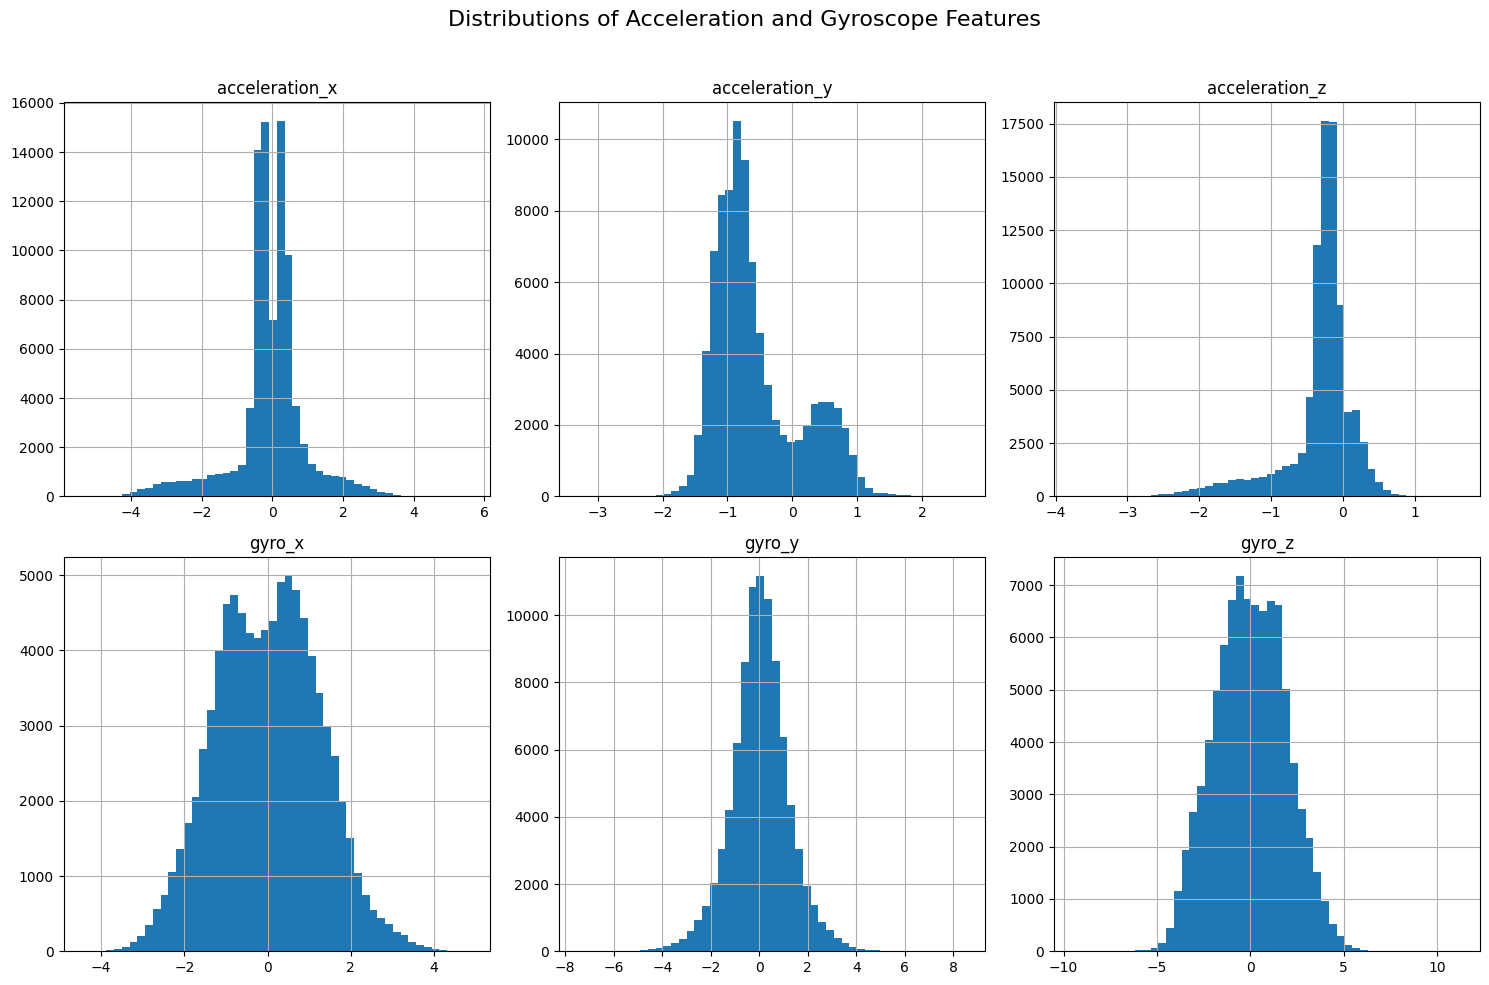

In [16]:
import matplotlib.pyplot as plt

# Plot distributions of acceleration and gyroscope features
features_to_plot = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
data[features_to_plot].hist(bins=50, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distributions of Acceleration and Gyroscope Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [17]:
from scipy.stats import skew, kurtosis, shapiro

# Initialize a dictionary to store results
normality_metrics = {}

# Compute skewness, kurtosis, and Shapiro-Wilk test for each feature
for feature in features_to_plot:
    feature_data = data[feature]
    skewness = skew(feature_data)
    kurt = kurtosis(feature_data)  # Excess kurtosis
    shapiro_stat, shapiro_p = shapiro(feature_data)
    
    normality_metrics[feature] = {
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Shapiro-Wilk p-value': shapiro_p
    }

normality_metrics_df = pd.DataFrame(normality_metrics).T

print(normality_metrics_df)

                Skewness  Kurtosis  Shapiro-Wilk p-value
acceleration_x -0.620982  3.420257         1.376530e-111
acceleration_y  0.907732  0.017876         1.418144e-106
acceleration_z -1.837743  4.609419         6.009142e-126
gyro_x          0.069081 -0.271850          4.071765e-32
gyro_y         -0.023932  1.489396          5.992492e-61
gyro_z          0.041732 -0.373358          1.187798e-34


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Split the data into features (X) and target (y)
X = data.iloc[:, 5:]  # All sensor readings (after 'activity')
y = data['activity']

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Fit a Gaussian Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy) 
print("\nClassification report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Accuracy:  0.9570305151070474

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     13267
           1       0.99      0.92      0.96     13310

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577

Confusion Matrix:
 [[13153   114]
 [ 1028 12282]]


In [19]:
# Step 5: Separate predictors into acceleration and gyroscope features
acceleration_features = ['acceleration_x', 'acceleration_y', 'acceleration_z']
gyro_features = ['gyro_x', 'gyro_y', 'gyro_z']

# Model using only acceleration features
X_accel = data[acceleration_features]
X_train_accel, X_test_accel, y_train, y_test = train_test_split(X_accel, y, test_size=0.3, random_state=42, stratify=y)

model_accel = GaussianNB()
model_accel.fit(X_train_accel, y_train)
y_pred_accel = model_accel.predict(X_test_accel)
accuracy_accel = accuracy_score(y_test, y_pred_accel)
classification_rep_accel = classification_report(y_test, y_pred_accel)
conf_matrix_accel= confusion_matrix(y_test, y_pred_accel)

# Model using only gyroscope features
X_gyro = data[gyro_features]
X_train_gyro, X_test_gyro, y_train, y_test = train_test_split(X_gyro, y, test_size=0.3, random_state=42, stratify=y)

model_gyro = GaussianNB()
model_gyro.fit(X_train_gyro, y_train)
y_pred_gyro = model_gyro.predict(X_test_gyro)
accuracy_gyro = accuracy_score(y_test, y_pred_gyro)
classification_rep_gyro = classification_report(y_test, y_pred_gyro)
conf_matrix_gyro= confusion_matrix(y_test, y_pred_gyro)


print("Accuracy Accel: ", accuracy_accel) 
print("\nClassification report Accel:\n", classification_rep_accel)
print("Confusion Matrix Accel:\n", conf_matrix_accel)

print("\nAccuracy Gyro: ", accuracy_gyro) 
print("\nClassification report Gyro:\n", classification_rep_gyro)
print("Confusion Matrix Gyro:\n", conf_matrix_gyro)


Accuracy Accel:  0.9589494675847537

Classification report Accel:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     13267
           1       0.99      0.92      0.96     13310

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577

Confusion Matrix Accel:
 [[13191    76]
 [ 1015 12295]]

Accuracy Gyro:  0.6468751175828724

Classification report Gyro:
               precision    recall  f1-score   support

           0       0.62      0.74      0.68     13267
           1       0.68      0.55      0.61     13310

    accuracy                           0.65     26577
   macro avg       0.65      0.65      0.64     26577
weighted avg       0.65      0.65      0.64     26577

Confusion Matrix Gyro:
 [[9825 3442]
 [5943 7367]]
